Epoch 1/20


c:\Users\Slyexistence\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9105 - loss: 0.3600 - val_accuracy: 0.9519 - val_loss: 0.1204
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9558 - loss: 0.1162 - val_accuracy: 0.9812 - val_loss: 0.0566
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9787 - loss: 0.0584 - val_accuracy: 0.9916 - val_loss: 0.0331
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9909 - loss: 0.0263 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9955 - loss: 0.0161 - val_accuracy: 1.0000 - val_loss: 5.8556e-04
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 3.8241e-04
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9980 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 3.9425e-04
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 1

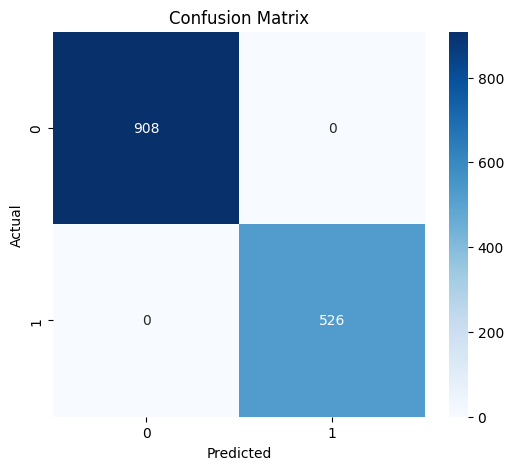

Модель сохранена в файл 'arp_spoofing_detector.h5'


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv(r"D:\Проекты\Дипломаня работа\DoFitN\Code\DoFitN\data\processed_arp_data_augmented.csv")  # Загружаем датасет

# Кодируем MAC-адреса и IP-адреса в числовые значения
label_encoder_mac = LabelEncoder()
df['sender_mac'] = label_encoder_mac.fit_transform(df['sender_mac'])
df['target_mac'] = label_encoder_mac.fit_transform(df['target_mac'])

label_encoder_ip = LabelEncoder()
df['sender_ip'] = label_encoder_ip.fit_transform(df['sender_ip'])
df['target_ip'] = label_encoder_ip.fit_transform(df['target_ip'])

# Выбираем признаки
features = ["timestamp", "sender_mac", "sender_ip", "target_mac", "target_ip", "operation"]
target = "label"

X = df[features].values
y = df[target].values

#  Масштабирование данных
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.expand_dims(X_train, axis=2)  # Добавляем размерность для Conv1D
X_test = np.expand_dims(X_test, axis=2)


model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    GRU(64, return_sequences=True),
    GRU(32),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Выходной слой для бинарной классификации
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 20
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# save
# model.save("arp_spoofing_detector.h5")
# print("Модель сохранена в файл 'arp_spoofing_detector.h5'")

Epoch 1/20


c:\Users\Slyexistence\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9307 - loss: 0.2525 - val_accuracy: 1.0000 - val_loss: 3.8404e-04
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 9.1224e-05
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.6474e-04 - val_accuracy: 1.0000 - val_loss: 3.6624e-05
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.4431e-04 - val_accuracy: 1.0000 - val_loss: 1.9002e-05
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.0166e-04 - val_accuracy: 1.0000 - val_loss: 1.0457e-05
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.5644e-05 - val_accuracy: 1.0000 - val_loss: 6.3358e-06
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.9462e-05 - val_accuracy: 1.0000 - val_loss: 4.2287e-06
Epoch 8/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0

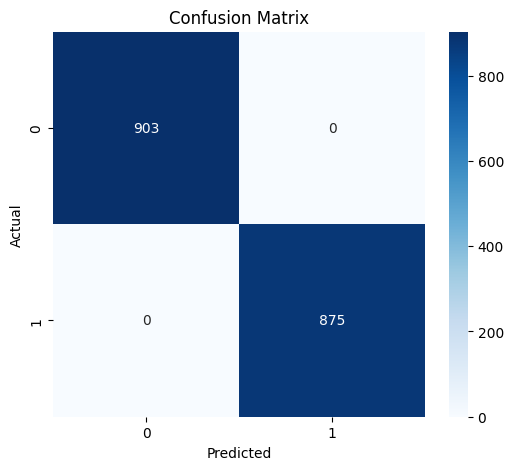

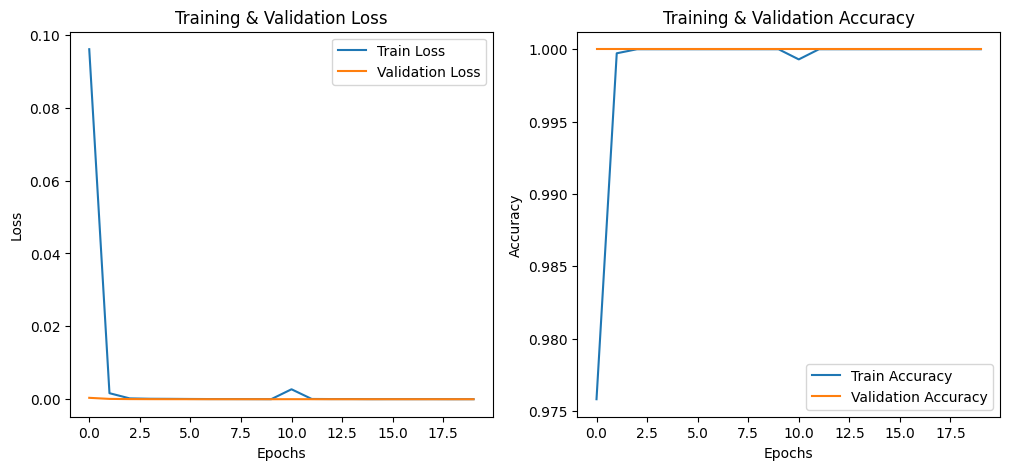

Модель сохранена в файл 'arp_spoofing_detector.h5'


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Загрузка и предобработка данных
df = pd.read_csv(r"D:\Проекты\Дипломаня работа\DoFitN\Code\DoFitN\main\New_data.csv")   # Загружаем датасет

# Кодируем MAC-адреса и IP-адреса в числовые значения
label_encoder_mac = LabelEncoder()
df['sender_mac'] = label_encoder_mac.fit_transform(df['sender_mac'])
df['target_mac'] = label_encoder_mac.fit_transform(df['target_mac'])

label_encoder_ip = LabelEncoder()
df['sender_ip'] = label_encoder_ip.fit_transform(df['sender_ip'])
df['target_ip'] = label_encoder_ip.fit_transform(df['target_ip'])

# Выбираем признаки
features = ["timestamp", "sender_mac", "sender_ip", "target_mac", "target_ip", "operation"]
target = "label"

X = df[features].values
y = df[target].values

# 2. Масштабирование данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.expand_dims(X_train, axis=2)  # Добавляем размерность для Conv1D
X_test = np.expand_dims(X_test, axis=2)

# 4. Создание модели (CNN + GRU)
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    GRU(64, return_sequences=True),
    GRU(32),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Выходной слой для бинарной классификации
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Обучение модели
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# 6. Оценка модели
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# 7. Визуализация матрицы ошибок
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 8. Визуализация кривых точности и потерь
plt.figure(figsize=(12, 5))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

# 9. Сохранение модели
model.save("arp_spoofing_detector.h5")
print("Модель сохранена в файл 'arp_spoofing_detector.h5'")
